In [44]:
#practice what we've learned till so far(ml11.ipynb)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#predict maas column
data=pd.read_csv("maaslar_yeni.csv")
df=data.copy()
df.sample(6)

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
25,26,Sef,6,1,2,4000
1,2,Sekreter,2,5,70,2500
21,22,Sekreter,2,2,53,2200
4,5,Proje Yoneticisi,5,5,70,5500
10,11,Cayci,1,7,99,2000
14,15,Proje Yoneticisi,5,1,80,5000


In [47]:
#calisan id column and unvan column need to be taken out
#we have already unvanseviyesi instead of unvan

df=df.drop(columns=["Calisan ID","unvan"])
df.head()

,UnvanSeviyesi,Kidem,Puan,maas
0,1,5,70,2250
1,2,5,70,2500
2,3,5,70,3000
3,4,5,70,4000
4,5,5,70,5500


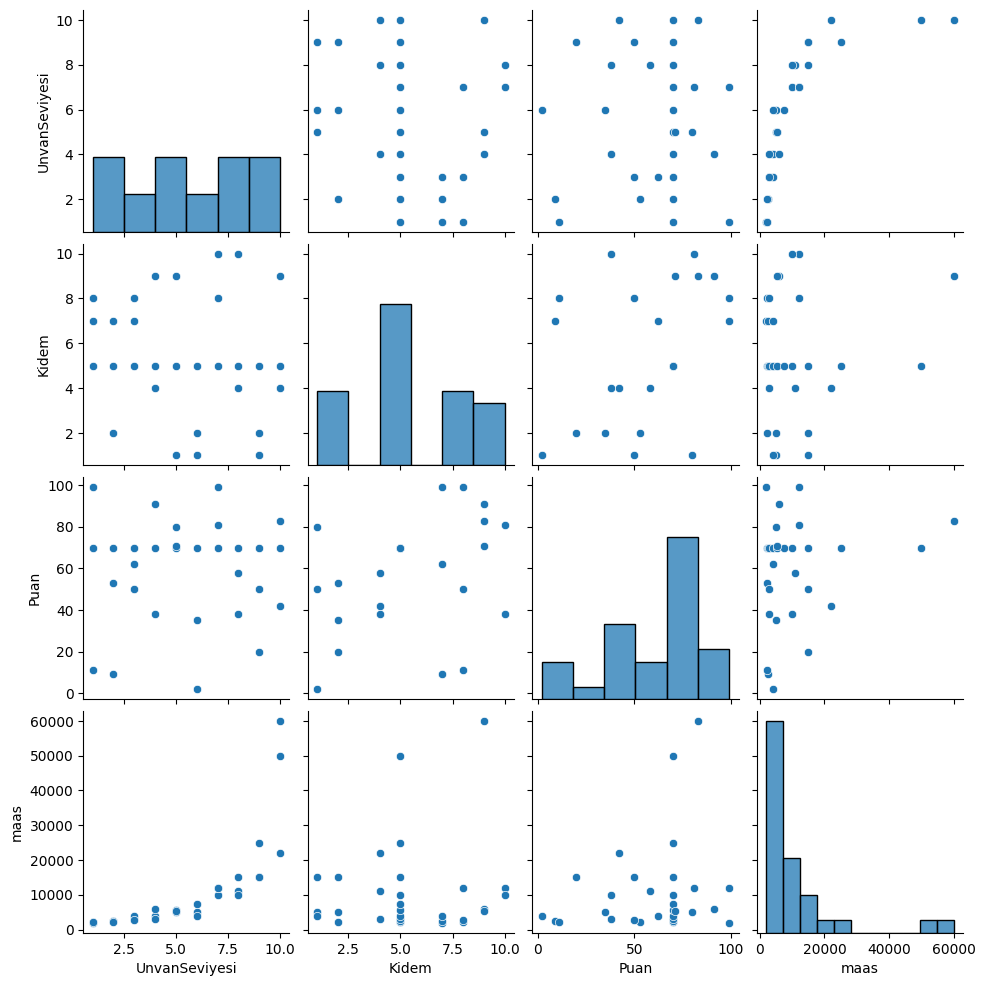

In [48]:
import seaborn as sbn

sbn.pairplot(data=df)

In [49]:
#split data as x and y

x=df.iloc[:,0:3]
x.head()

,UnvanSeviyesi,Kidem,Puan
0,1,5,70
1,2,5,70
2,3,5,70
3,4,5,70
4,5,5,70


In [50]:
y=df["maas"]
y

0      2250
1      2500
2      3000
3      4000
4      5500
5      7500
6     10000
7     15000
8     25000
9     50000
10     2000
11     2500
12     4000
13     3000
14     5000
15     5000
16    12000
17    11000
18    15000
19    22000
20     2200
21     2200
22     2800
23     6000
24     5400
25     4000
26    12000
27    10000
28    15000
29    60000
Name: maas, dtype: int64

In [51]:
#apply linear regression

from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

linear_reg.fit(x,y)


LinearRegression()

In [52]:
#let's check out if there is unnecessary columns to develop this model
#use p value and backward elimination

import statsmodels.api as sm

model1=sm.OLS(linear_reg.predict(x),x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                    8.38e-14
Time:                        00:23:55   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2494.8107    256.145      9.740      0.000    1969.244    3020.377
Kidem             1.3531    318.990      0.004      0.997    -653.161     655.867
Puan            -26.5687     33.657     -0.789      0.437     -95.626      42.489
==============================================================================
Omnibus:                        0.440   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.573
Skew:                           0.109   Prob(JB):                        0.751
Kurtosis:                       2.359   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#lets take out x2 and x3 columns
x=df.iloc[:,0:1]

#you can either try with former x value. for some models 3 parameter used x is better.
#we will go on with one parametered x

linear_reg.fit(x,y)

model=sm.OLS(linear_reg.predict(x),x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                    1.93e-19
Time:                        00:23:55   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:                                      576.9
Df Residuals:                      29   BIC:                                      578.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2269.9134    104.919     21.635      0.000    2055.330    2484.497
==============================================================================
Omnibus:                        5.870   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                1.873
Skew:                          -0.000   Prob(JB):                        0.392
Kurtosis:                       1.776   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#POLYNOMIAL REGRESSION

from numpy import poly
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=6)

x_poly=poly_reg.fit_transform(x)

linear_reg2=LinearRegression()

linear_reg2.fit(x_poly,y)

LinearRegression()

In [55]:
model2=sm.OLS(linear_reg2.predict(x_poly),x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              87.96
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                    2.77e-10
Time:                        00:23:55   Log-Likelihood:                         -312.51
No. Observations:                  30   AIC:                                      627.0
Df Residuals:                      29   BIC:                                      628.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2269.9134    242.026      9.379      0.000    1774.915    2764.912
==============================================================================
Omnibus:                       28.450   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.124
Skew:                           2.339   Prob(JB):                     3.55e-11
Kurtosis:                       7.076   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from sklearn.metrics import r2_score

r2_score(y,linear_reg2.predict(x_poly))

0.8314640654707844

In [57]:
#SVR
#scale x and y for SVR 

#turn y to a df not to have an error

y=df[["maas"]]
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_scaled=ss.fit_transform(x)
y_scaled=ss.fit_transform(y)

In [58]:
#apply support vector machine

from sklearn.svm import SVR
#linear', 'poly', 'rbf', 'sigmoid'

svr=SVR(kernel="rbf")

svr.fit(x_scaled,y_scaled)

model3=sm.OLS(svr.predict(x_scaled),x_scaled).fit()
model3.summary()

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              97.19
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                    9.11e-11
Time:                        00:23:55   Log-Likelihood:                         -1.3680
No. Observations:                  30   AIC:                                      4.736
Df Residuals:                      29   BIC:                                      6.137
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4636      0.047      9.858      0.000       0.367       0.560
==============================================================================
Omnibus:                        9.456   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                2.433
Skew:                           0.179   Prob(JB):                        0.296
Kurtosis:                       1.652   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
r2_score(y_scaled,svr.predict(x_scaled))

0.5841869084594333

In [60]:
#DECISION TREE

from sklearn.tree import DecisionTreeRegressor

decision_tree_reg=DecisionTreeRegressor(random_state=0)

decision_tree_reg.fit(x,y)

model4=sm.OLS(dt_r.predict(x),x).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              87.29
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                    3.01e-10
Time:                        00:23:55   Log-Likelihood:                         -312.62
No. Observations:                  30   AIC:                                      627.2
Df Residuals:                      29   BIC:                                      628.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2269.9134    242.950      9.343      0.000    1773.025    2766.802
==============================================================================
Omnibus:                       27.769   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.942
Skew:                           2.292   Prob(JB):                     1.06e-10
Kurtosis:                       6.968   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
r2_score(y,decision_tree_reg.predict(x))

0.8343186200100907

In [62]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=10,random_state=0)

rfr.fit(x,y)

model5=sm.OLS(rfr.predict(x),x).fit()
model5.summary()

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              74.13
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                    1.75e-09
Time:                        00:23:55   Log-Likelihood:                         -315.35
No. Observations:                  30   AIC:                                      632.7
Df Residuals:                      29   BIC:                                      634.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2290.6820    266.050      8.610      0.000    1746.548    2834.816
==============================================================================
Omnibus:                       28.961   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.982
Skew:                           2.369   Prob(JB):                     1.40e-11
Kurtosis:                       7.189   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
r2_score(y,rfr.predict(x))

0.8284081476481634

In [64]:
#correlation matrix
#we can use p value or corr matrix to learn the relationships among columns
df=data.copy().drop(columns=["unvan"])

df.corr()

,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
Calisan ID,1.000000,0.331847,0.206278,-0.251278,0.226287
UnvanSeviyesi,0.331847,1.000000,-0.125200,0.034948,0.727036
Kidem,0.206278,-0.125200,1.000000,0.322796,0.117964
Puan,-0.251278,0.034948,0.322796,1.000000,0.201474
maas,0.226287,0.727036,0.117964,0.201474,1.000000
